In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('customer data.csv')

In [3]:
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 4
0,1,19,15,39,NaN
1,2,21,15,81,NaN
2,3,20,16,6,NaN
3,4,23,16,77,NaN
4,5,31,17,40,NaN
5,6,22,17,76,NaN
6,7,35,18,6,NaN
7,8,23,18,94,NaN
8,9,64,19,3,NaN
9,10,30,19,72,NaN


In [4]:
x=dataset.iloc[:,[2,3]].values

In [5]:
x

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98]], dtype=int64)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

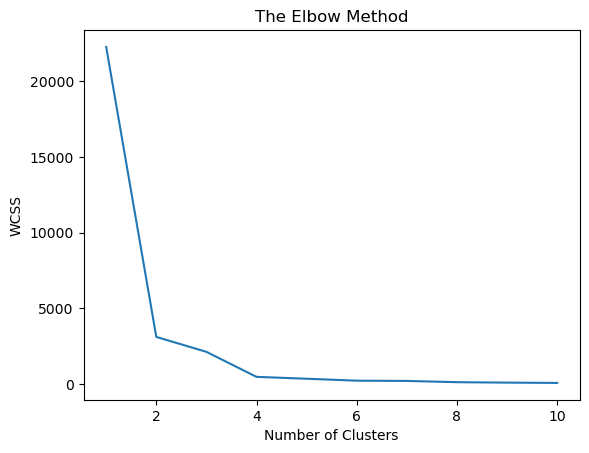

In [7]:
from sklearn.cluster import KMeans
list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    list.append(kmeans.inertia_)
plt.plot(range(1,11),list)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_Group']=y_kmeans

In [12]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 4,Cluster_Group
0,1,19,15,39,NaN,3
1,2,21,15,81,NaN,2
2,3,20,16,6,NaN,1
3,4,23,16,77,NaN,2
4,5,31,17,40,NaN,3
5,6,22,17,76,NaN,2
6,7,35,18,6,NaN,1
7,8,23,18,94,NaN,0
8,9,64,19,3,NaN,1
9,10,30,19,72,NaN,2


In [15]:
centroids=kmeans.cluster_centers_

In [17]:
centroids

array([[20.        , 97.        ],
       [18.66666667,  9.5       ],
       [18.28571429, 75.42857143],
       [19.        , 35.75      ]])

In [18]:
y_kmeans

array([3, 2, 1, 2, 3, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 3, 2, 3, 0])

In [22]:
print(supervised.head())
print(supervised.columns)
print(len(supervised.columns))

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Unnamed: 4  \
0           1   19                  15                      39         NaN   
1           2   21                  15                      81         NaN   
2           3   20                  16                       6         NaN   
3           4   23                  16                      77         NaN   
4           5   31                  17                      40         NaN   

   Cluster_Group  
0              3  
1              2  
2              1  
3              2  
4              3  
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Unnamed: 4', 'Cluster_Group'],
      dtype='object')
6


C:\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


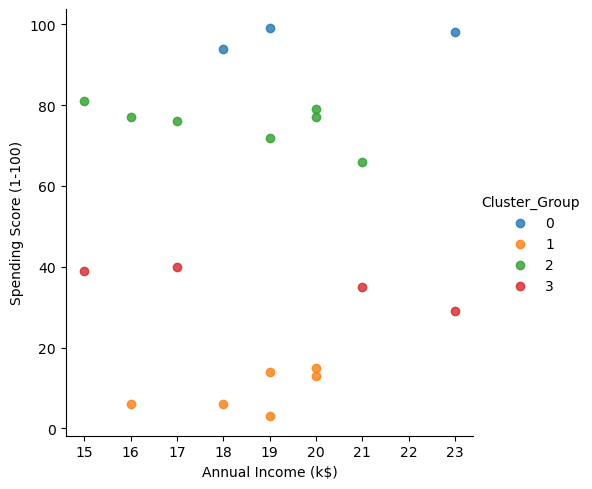

In [29]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[2],y=supervised.columns[3],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)

